<a href="https://colab.research.google.com/github/itsvijay5111999/churn_rate_pred/blob/main/health_care_dybatic_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=1000, n_features=8,
                           n_informative=6, n_redundant=2,
                           weights=[0.7, 0.3], random_state=42)

df = pd.DataFrame(X, columns=[
    'Glucose', 'BloodPressure', 'BMI', 'Insulin',
    'Age', 'SkinThickness', 'Pedigree', 'Cholesterol'
])
df['Gender'] = np.random.choice(['Male', 'Female'], size=1000)
df['FamilyHistory'] = np.random.choice(['Yes', 'No'], size=1000)
df['Outcome'] = y

In [4]:
df

,Glucose,BloodPressure,BMI,Insulin,Age,SkinThickness,Pedigree,Cholesterol,Gender,FamilyHistory,Outcome
0,-1.732538,5.260112,-2.952194,-4.603768,2.235848,1.928893,-0.101845,3.193487,Female,No,0
1,2.072914,2.240572,-1.385104,-2.514962,-0.984756,1.436260,-1.255271,2.089872,Female,No,0
2,-0.263106,1.527781,-1.872414,-0.028009,1.612809,3.264194,-1.296421,1.537870,Male,Yes,0
3,-0.164349,-0.550131,-0.019503,-0.765000,2.273523,2.084217,-0.321931,0.426253,Female,No,0
4,-3.083085,4.162165,-3.395942,0.367563,-0.254842,1.454374,-0.786841,-3.549126,Female,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.494367,0.529076,-1.582995,1.394706,-2.478681,0.551605,-0.972744,-1.119851,Female,No,1
996,-4.853406,5.276896,0.432692,0.278486,1.164342,0.115616,-1.755517,0.818323,Male,Yes,0
997,-1.505534,4.155580,-0.211547,0.238826,-2.743496,-0.548802,-2.186429,-2.636497,Female,No,0
998,1.128380,-0.791332,-1.368994,-0.814327,-0.088371,0.860461,0.479181,-1.534658,Female,No,1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Basic EDA


In [8]:
df.head()

,Glucose,BloodPressure,BMI,Insulin,Age,SkinThickness,Pedigree,Cholesterol,Gender,FamilyHistory,Outcome
0,-1.732538,5.260112,-2.952194,-4.603768,2.235848,1.928893,-0.101845,3.193487,Female,No,0
1,2.072914,2.240572,-1.385104,-2.514962,-0.984756,1.436260,-1.255271,2.089872,Female,No,0
2,-0.263106,1.527781,-1.872414,-0.028009,1.612809,3.264194,-1.296421,1.537870,Male,Yes,0
3,-0.164349,-0.550131,-0.019503,-0.765000,2.273523,2.084217,-0.321931,0.426253,Female,No,0
4,-3.083085,4.162165,-3.395942,0.367563,-0.254842,1.454374,-0.786841,-3.549126,Female,Yes,0


In [10]:
df['Outcome'].value_counts()

,count
Outcome,
0,693
1,307


<Axes: xlabel='Outcome', ylabel='count'>

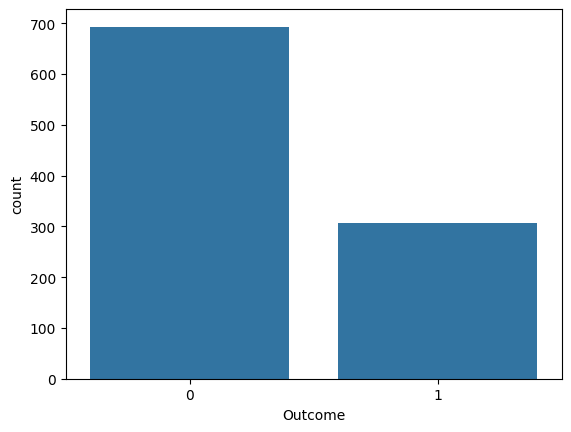

In [11]:
sns.countplot(data = df, x = 'Outcome')

Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()


In [13]:
df['Gender'] = lr.fit_transform(df['Gender'])
df['FamilyHistory'] = lr.fit_transform(df['FamilyHistory'])

In [14]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [15]:
x

,Glucose,BloodPressure,BMI,Insulin,Age,SkinThickness,Pedigree,Cholesterol,Gender,FamilyHistory
0,-1.732538,5.260112,-2.952194,-4.603768,2.235848,1.928893,-0.101845,3.193487,0,0
1,2.072914,2.240572,-1.385104,-2.514962,-0.984756,1.436260,-1.255271,2.089872,0,0
2,-0.263106,1.527781,-1.872414,-0.028009,1.612809,3.264194,-1.296421,1.537870,1,1
3,-0.164349,-0.550131,-0.019503,-0.765000,2.273523,2.084217,-0.321931,0.426253,0,0
4,-3.083085,4.162165,-3.395942,0.367563,-0.254842,1.454374,-0.786841,-3.549126,0,1
...,...,...,...,...,...,...,...,...,...,...
995,1.494367,0.529076,-1.582995,1.394706,-2.478681,0.551605,-0.972744,-1.119851,0,0
996,-4.853406,5.276896,0.432692,0.278486,1.164342,0.115616,-1.755517,0.818323,1,1
997,-1.505534,4.155580,-0.211547,0.238826,-2.743496,-0.548802,-2.186429,-2.636497,0,0
998,1.128380,-0.791332,-1.368994,-0.814327,-0.088371,0.860461,0.479181,-1.534658,0,0


In [16]:
y

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,0
997,0
998,1


In [17]:
!pip install imbalanced-learn


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_res).value_counts())


Before SMOTE: Outcome
0    557
1    243
Name: count, dtype: int64
After SMOTE: Outcome
1    557
0    557
Name: count, dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:

Lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

In [38]:
y_pred = Lr.predict(x_test)

In [39]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", cm)

Accuracy: 0.805
Precision: 0.644
Recall: 0.875
F1 Score: 0.742
Confusion Matrix:
 [[105  31]
 [  8  56]]


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_res, y_res)

RandomForestClassifier()

In [41]:
y_pred1 = rf.predict(x_test)

In [42]:
# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc:.3f}")
print("Confusion Matrix:\n", cm)


Accuracy: 0.805
Precision: 0.644
Recall: 0.875
F1 Score: 0.742
ROC AUC: 0.824
Confusion Matrix:
 [[105  31]
 [  8  56]]


In [43]:
!pip install xgboost


In [44]:
from xgboost import XGBClassifier

In [45]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [46]:
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [47]:
y_pred3 = model.predict(x_test)

In [48]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc:.3f}")
print("Confusion Matrix:\n", cm)


Accuracy: 0.805
Precision: 0.644
Recall: 0.875
F1 Score: 0.742
ROC AUC: 0.824
Confusion Matrix:
 [[105  31]
 [  8  56]]


after hyperparameter tunning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees
    'max_depth': [3, 5, 7],               # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],        # Subsample ratio of training instances
    'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}


In [51]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)


In [53]:
grid_search.fit(X_res, y_res)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [54]:
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [56]:
y_pred = best_model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.910
Precision: 0.838
Recall: 0.891
F1 Score: 0.864
ROC AUC: 0.905
Confusion Matrix:
 [[125  11]
 [  7  57]]


In [57]:
!pip install lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.1 MB/s eta 0:00:00


In [60]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [61]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_res, y_res)

[LightGBM] [Info] Number of positive: 557, number of negative: 557
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 1114, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [63]:
y_pred_lgb = lgb_model.predict(x_test)

In [64]:
print("📘 LightGBM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

📘 LightGBM Results
Accuracy: 0.92
Precision: 0.8636363636363636
Recall: 0.890625
F1 Score: 0.8769230769230769
ROC AUC: 0.9122242647058824
Confusion Matrix:
 [[127   9]
 [  7  57]]


In [65]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_res, y_res)

In [67]:
y_pred_cat = cat_model.predict(x_test)

In [68]:
print("\n🐱 CatBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Precision:", precision_score(y_test, y_pred_cat))
print("Recall:", recall_score(y_test, y_pred_cat))
print("F1 Score:", f1_score(y_test, y_pred_cat))
print("ROC AUC:", roc_auc_score(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))


🐱 CatBoost Results
Accuracy: 0.915
Precision: 0.8507462686567164
Recall: 0.890625
F1 Score: 0.8702290076335878
ROC AUC: 0.9085477941176471
Confusion Matrix:
 [[126  10]
 [  7  57]]
